In [1]:
from Data_Gathering_and_Preprocessing.data_processing import Preprocessing, empty_files
from Model_Active_Learning.active_learning import Active_learning
from Labeling.Videolabeler import VideoLabeler

In [2]:
empty_files(['features_Walking.txt', 'features_Walking_scaled.csv', 'processed_data_files.txt'])
# Preprocessing.plot_accelerometer(r'csvfile_test1.csv', 2.5, 1.5)
# Preprocessing.plot_accelerometer(r'csvfile_test2.csv', 2.5, 1.5)

pre = Preprocessing('Walking')
pre.windowing([r"csvfile_test1.csv", r"csvfile_test1_gyro.csv"], r"notebook dingen/Walking_part_2.mp4", # csvfile_test1.csv or csvfile_test_gyro_2
              start_offset=2.5, stop_offset=5, size=1, offset=0.2, epsilon=0.05, do_plot=False, do_scale=False)
pre.windowing([r"csvfile_test2.csv", r"csvfile_test2_gyro.csv"], r"notebook dingen/Walking_part_1.mp4", # csvfile_test1.csv or csvfile_test_gyro_1
              start_offset=2.5, stop_offset=5, size=1, offset=0.2, epsilon=0.05, do_plot=False, do_scale=True)

It stopped at gyrocsope 86.99 5 ['75.93', '76.135', '76.34', '76.54', '76.745', '76.95', '77.154', '77.358', '77.562']
['2', '2.517', '2.721', '2.925', '3.129', '3.333', '3.537', '3.741', '3.945', '4.145', '4.345', '4.545', '4.745', '4.945', '5.149', '5.353', '5.557', '5.761', '5.965', '6.165', '6.365', '6.565', '6.77', '6.97', '7.17', '7.37', '7.57', '7.775', '7.98', '8.183', '8.386', '8.589', '8.792', '8.995', '9.195', '9.395', '9.595', '9.795', '9.995', '10.199', '10.402', '10.606', '10.81', '11.01', '11.21', '11.41', '11.61', '11.81', '12.01', '12.21', '12.41', '12.61', '12.81', '13.014', '13.218', '13.422', '13.626', '13.83', '14.03', '14.23', '14.43', '14.63', '14.83', '15.034', '15.238', '15.442', '15.646', '15.85', '16.054', '16.258', '16.462', '16.666', '16.87', '17.07', '17.27', '17.47', '17.67', '17.87', '18.074', '18.278', '18.482', '18.686', '18.89', '19.09', '19.29', '19.49', '19.69', '19.89', '20.094', '20.298', '20.502', '20.706', '20.91', '21.11', '21.31', '21.51', '21

12.992 1


[0.01, 0.06, 0.46, 0.47]
Enter the index or the name of one of the following labels. Enter 'n' to add a new label:
1. walking
2. running
3. stairs_up
4. stairs_down


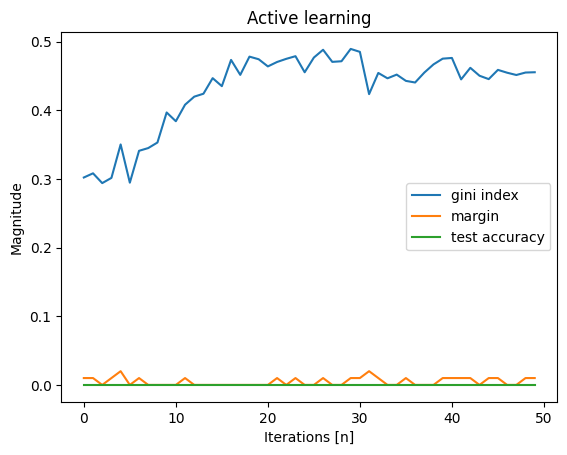

In [3]:
# labels = set()
# with open(r'features_Walking_scaled.csv') as f:
#     for line in f:
#         labels |= {line.strip().split(',')[1]}
# print(labels)
labels = ['walking', 'running', 'stairs_up', 'stairs_down']
# vid = VideoLabeler(labels)
# vid.labeling

AL = Active_learning(r'features_Walking_scaled.csv', labels=labels, window_size=1)
AL.training(50)
AL.plotting()
AL.write_to_file()